In [1]:
import polars as pl
import numpy as np
import warnings
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import polars.selectors as cs

warnings.filterwarnings("ignore")

commission = 0.25 / 10000.0

In [2]:
result_hour = pl.read_parquet('./kline_1d_df.parquet')
result_hour = result_hour.sort('open_time','jj_code')
result_hour = result_hour.rename({"jj_code": "symbol"})

In [8]:
result_hour = result_hour.sort('close_time', 'symbol')
# result_hour = result_hour.sort('symbol', 'close_time')
result_hour

symbol,open_time,close_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
str,datetime[ms],datetime[ms],f64,f64,f64,f64,f64,f64,i64,f64,f64
"""BCHUSDT""",2020-01-01 00:00:00,2020-01-01 23:59:59.999,204.72,208.95,202.95,204.44,235950.127,4.8629e7,36700,115834.074,2.3873e7
"""BTCUSDT""",2020-01-01 00:00:00,2020-01-01 23:59:59.999,7189.43,7260.43,7170.15,7197.57,56801.329,4.0968e8,101871,28834.2,2.0800e8
"""ETHUSDT""",2020-01-01 00:00:00,2020-01-01 23:59:59.999,129.12,132.96,128.62,130.62,466063.929,6.1038e7,40168,232492.871,3.0446e7
"""BCHUSDT""",2020-01-02 00:00:00,2020-01-02 23:59:59.999,204.45,205.54,192.08,195.73,307659.505,6.1783e7,44112,149683.497,3.0073e7
"""BTCUSDT""",2020-01-02 00:00:00,2020-01-02 23:59:59.999,7197.57,7209.59,6922.0,6962.04,115295.677,8.1563e8,224747,55404.262,3.9191e8
…,…,…,…,…,…,…,…,…,…,…,…
"""ZETAUSDT""",2024-08-04 00:00:00,2024-08-04 23:59:59.999,0.4405,0.4693,0.42,0.4365,3.4983473e7,1.5649e7,135889,1.736503e7,7.7707e6
"""ZILUSDT""",2024-08-04 00:00:00,2024-08-04 23:59:59.999,0.01422,0.01441,0.01301,0.01351,7.54978515e8,1.0355e7,77995,3.72537788e8,5.1092e6
"""ZKUSDT""",2024-08-04 00:00:00,2024-08-04 23:59:59.999,0.11451,0.11673,0.10122,0.10646,8.67048273e8,9.4865e7,742082,4.14946312e8,4.5429e7


In [4]:
factors = result_hour.with_columns(
    ((pl.col('close') - pl.col('close').shift(1))/pl.col('close').shift(1)).over('symbol').alias('ret')
)
factors = factors.with_columns(
    (pl.col('ret').abs().rolling_sum(window_size=10)).over('symbol').alias('ret_sum')
)
factors = factors.with_columns(
    (pl.col('quote_volume').rolling_sum(window_size=10)).over('symbol').alias('volume_sum')
)
factors = factors.with_columns(
    (pl.col('ret_sum')/pl.col('volume_sum')).over('symbol').alias('amihud_ratio')
)
factors = factors.with_columns(
    (pl.col('amihud_ratio')+1).log().alias('amihud_ratio')
)

因子1：CLOSE
以收盘价作为因子数值，这个因子类似于市值因子

In [5]:
close = result_hour[["open_time", "symbol", "close"]].pivot(index="open_time", columns="symbol", values="close").sort("open_time")
volume = result_hour[["open_time", "symbol", "volume"]].pivot(index="open_time", columns="symbol", values="volume").sort("open_time")
columns = close.columns[1:]

# 因子写在这里：
factors = factors[["open_time", "symbol", 'amihud_ratio']].pivot(index="open_time", columns="symbol", values="amihud_ratio").sort("open_time")

# 因子未来收益率：
ret = close.clone()
ret[columns] = ret[columns].shift(-1) / ret[columns] - 1

# 对齐column
ret = ret[factors.columns] 
t = factors[["open_time"]] 

# 对齐open_time
ret = ret.join(t, how="inner", on=["open_time"]).sort(by=["open_time"]) 
factors = factors.sort(by=["open_time"])

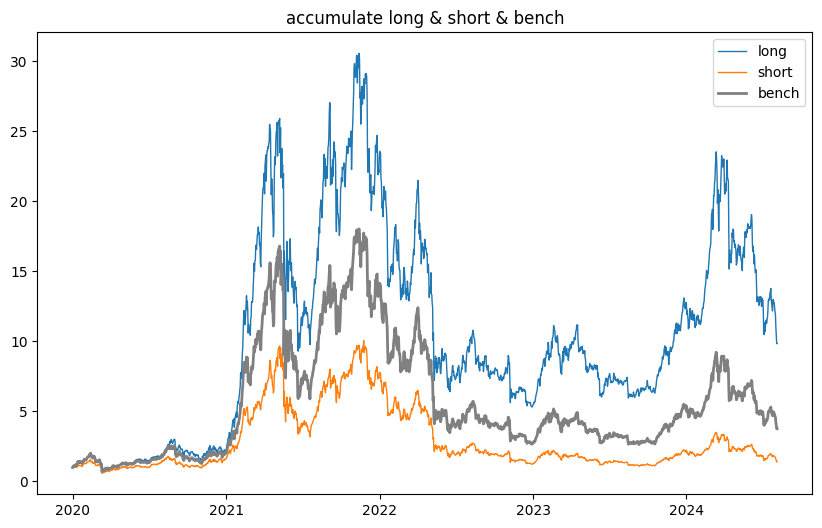

long: 
ann_return = 0.977  sharpe = 1.0177  maxdd = 0.8269  calmar_ratio = 1.1816  

short: 
ann_return = 0.5018  sharpe = 0.5512  maxdd = 0.8947  calmar_ratio = 0.5608  

bench: 
ann_return = 0.7386  sharpe = 0.7942  maxdd = 0.8554  calmar_ratio = 0.8634  



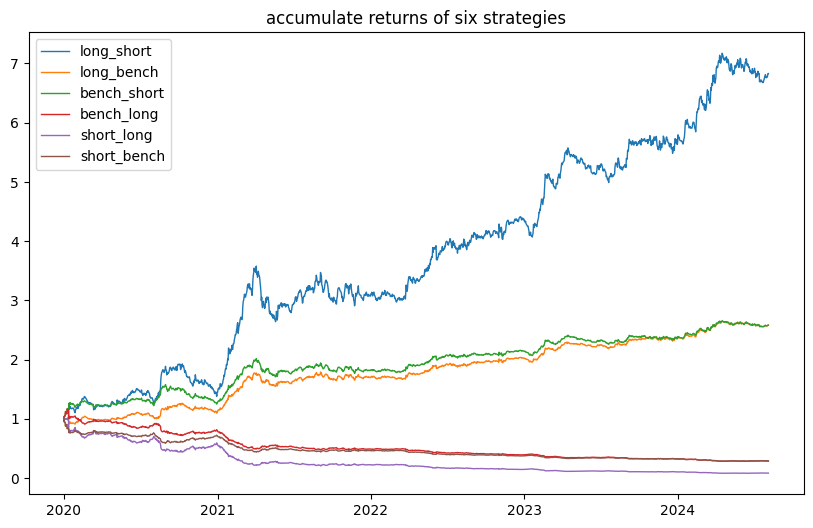

long_short: 
ann_return = 0.457  sharpe = 1.6211  maxdd = 0.2836  calmar_ratio = 1.6111  

long_bench: 
ann_return = 0.2202  sharpe = 1.3353  maxdd = 0.1904  calmar_ratio = 1.1562  

bench_short: 
ann_return = 0.2185  sharpe = 1.3955  maxdd = 0.2086  calmar_ratio = 1.0478  

bench_long: 
ann_return = -0.2567  sharpe = -1.5566  maxdd = 0.7567  calmar_ratio = -0.3392  

short_long: 
ann_return = -0.4935  sharpe = -1.7506  maxdd = 0.9172  calmar_ratio = -0.538  

short_bench: 
ann_return = -0.255  sharpe = -1.6286  maxdd = 0.7219  calmar_ratio = -0.3533  



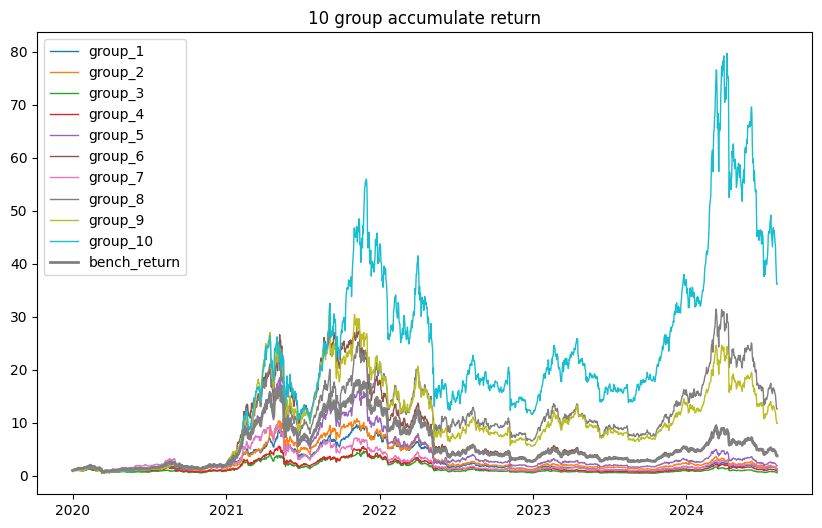

group_1: 
sharpe = 0.5016  ann_return = 0.4461  maxdd = 0.9195  calmar_ratio = 0.4852  

group_2: 
sharpe = 0.5605  ann_return = 0.5309  maxdd = 0.8969  calmar_ratio = 0.5919  

group_3: 
sharpe = 0.3626  ann_return = 0.3449  maxdd = 0.904  calmar_ratio = 0.3815  

group_4: 
sharpe = 0.4713  ann_return = 0.4568  maxdd = 0.8869  calmar_ratio = 0.515  

group_5: 
sharpe = 0.6494  ann_return = 0.6447  maxdd = 0.9175  calmar_ratio = 0.7026  

group_6: 
sharpe = 0.7941  ann_return = 0.802  maxdd = 0.9065  calmar_ratio = 0.8847  

group_7: 
sharpe = 0.5539  ann_return = 0.5331  maxdd = 0.9114  calmar_ratio = 0.5849  

group_8: 
sharpe = 1.0712  ann_return = 1.0552  maxdd = 0.7418  calmar_ratio = 1.4225  

group_9: 
sharpe = 1.0215  ann_return = 1.0191  maxdd = 0.8186  calmar_ratio = 1.2449  

group_10: 
sharpe = 1.3018  ann_return = 1.3  maxdd = 0.7938  calmar_ratio = 1.6377  



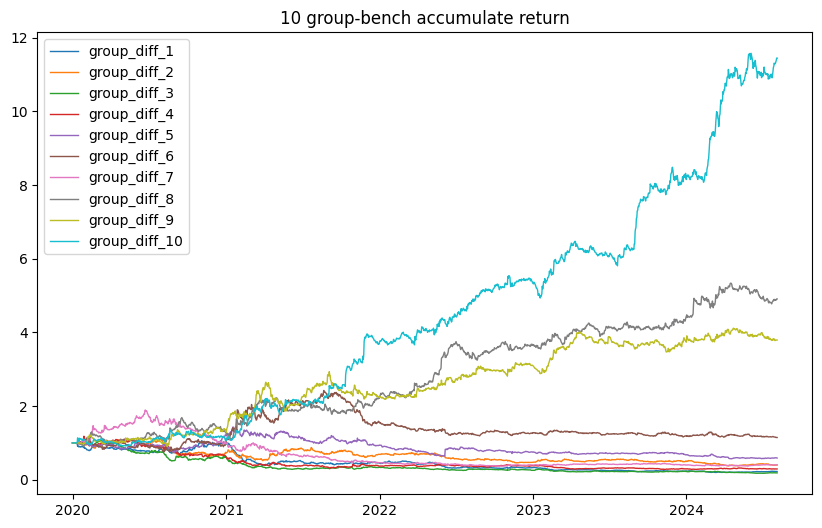

group_diff_1: 
sharpe = -0.8876  ann_return = -0.2771  maxdd = 0.8137  calmar_ratio = -0.3406  

group_diff_2: 
sharpe = -0.5006  ann_return = -0.153  maxdd = 0.6662  calmar_ratio = -0.2297  

group_diff_3: 
sharpe = -1.0616  ann_return = -0.3201  maxdd = 0.8439  calmar_ratio = -0.3793  

group_diff_4: 
sharpe = -0.7904  ann_return = -0.2262  maxdd = 0.7626  calmar_ratio = -0.2967  

group_diff_5: 
sharpe = -0.2334  ann_return = -0.0707  maxdd = 0.6037  calmar_ratio = -0.1171  

group_diff_6: 
sharpe = 0.2476  ann_return = 0.0866  maxdd = 0.5266  calmar_ratio = 0.1645  

group_diff_7: 
sharpe = -0.5355  ann_return = -0.1544  maxdd = 0.8052  calmar_ratio = -0.1917  

group_diff_8: 
sharpe = 1.2987  ann_return = 0.3903  maxdd = 0.3534  calmar_ratio = 1.1042  

group_diff_9: 
sharpe = 1.1068  ann_return = 0.3352  maxdd = 0.2963  calmar_ratio = 1.1311  

group_diff_10: 
sharpe = 1.8782  ann_return = 0.5767  maxdd = 0.2076  calmar_ratio = 2.7772  



In [6]:
factors_np = factors[columns].to_numpy()
ret_np = ret[columns].to_numpy()

def factor_stats(n, pnl):
    net_value = (1 + pnl).cum_prod()
    sharpe = n ** 0.5 * pnl.mean() / pnl.std()
    ann_return = n * pnl.mean()
    maxdd = (-(net_value / net_value.cum_max() - 1)).max()
    calmar_ratio = ann_return / maxdd

    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')


percentage = 0.5
quantiles = np.nanquantile(factors_np, [1 - percentage, percentage], axis=1)

f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)
long_quantile, short_quantile = f(0), f(1)

# return before fee
long = np.nan_to_num(np.nan_to_num(ret_np * (factors_np > long_quantile), 0.0).sum(axis=1) / (factors_np > long_quantile).sum(axis=1) , 0.0)
short = np.nan_to_num(np.nan_to_num(ret_np * (factors_np < long_quantile), 0.0).sum(axis=1) / (factors_np < long_quantile).sum(axis=1) , 0.0)
bench = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)

# return after fee
long_fee = pl.Series(long - 2 * commission)
short_fee = pl.Series(short - 2 * commission)
bench_fee = pl.Series(bench - 2 * commission)

long_short = pl.Series(long - short - 2 * commission)
long_bench = pl.Series(long - bench - 2 * commission)
bench_short = pl.Series(bench - short - 2 * commission)
bench_long = pl.Series(bench - long - 2 * commission)
short_long = pl.Series(short - long - 2 * commission)
short_bench = pl.Series(short - bench - 2 * commission)


long_cum = (1 + long_fee).cum_prod()
short_cum = (1 + short_fee).cum_prod()
bench_cum = (1 + bench_fee).cum_prod()

long_short_cum = (1 + long_short).cum_prod()
long_bench_cum = (1 + long_bench).cum_prod()
bench_short_cum = (1 + bench_short).cum_prod()
bench_long_cum = (1 + bench_long).cum_prod()
short_long_cum = (1 + short_long).cum_prod()
short_bench_cum = (1 + short_bench).cum_prod()


plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_cum.to_pandas(), label='long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_cum.to_pandas(), label='short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_cum.to_pandas(), label='bench', linewidth=2, color="gray")
plt.title("accumulate long & short & bench")
plt.legend()
plt.show()

# 因子评价指标
# n = 365 * 24 #小时
n = 365 #天
# n = 52 #周
print("long: ")
factor_stats(n, long_fee)
print("\n")
print("short: ")
factor_stats(n, short_fee)
print("\n")
print("bench: ")
factor_stats(n, bench_fee)
print("\n")


plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_short_cum.to_pandas(), label='long_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), long_bench_cum.to_pandas(), label='long_bench', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_short_cum.to_pandas(), label='bench_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_long_cum.to_pandas(), label='bench_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_long_cum.to_pandas(), label='short_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(),short_bench_cum.to_pandas(), label='short_bench', linewidth=1)
plt.title("accumulate returns of six strategies")
plt.legend()
plt.show()


# 因子评价指标
print("long_short: ")
factor_stats(n, long_short)
print("\n")

print("long_bench: ")
factor_stats(n, long_bench)
print("\n")

print("bench_short: ")
factor_stats(n, bench_short)
print("\n")

print("bench_long: ")
factor_stats(n, bench_long)
print("\n")

print("short_long: ")
factor_stats(n, short_long)
print("\n")

print("short_bench: ")
factor_stats(n, short_bench)
print("\n")

###################################################################################################################

quantiles = np.nanquantile(factors_np, np.linspace(0, 1, 11), axis=1)
total_count = np.count_nonzero(~np.isnan(factors_np), axis=1)
f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)

#bench_return = np.nan_to_num(ret_np, 0.0).mean(axis=1)
bench_return = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)
bench_return_fee = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0) - 2 * commission
group_return = np.zeros((factors_np.shape[0], 10))
group_diff_return = np.zeros((factors_np.shape[0], 10))

for i in range(1, 11):
    # 计算在当前分位数范围内的总收益。如果因子值位于该分位数的范围内，则相应的收益被计入总和。
    ret_sum = np.nan_to_num(ret_np * (f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    # 计算当前分位数范围内的有效数据点数
    ret_count = np.nan_to_num((f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    group_return[:, i-1] = ret_sum / ret_count - 2 * commission 
    group_diff_return[:, i-1] = ret_sum / ret_count - bench_return - 2 * commission


group_return = np.nan_to_num(group_return)
group_diff_return = np.nan_to_num(group_diff_return)


plt.figure(figsize=(10, 6))
plt.title("10 group accumulate return")
for i in range(10):
    plt.plot(factors["open_time"].to_pandas(), np.cumprod(1 + group_return[:, i]), label=f"group_{i+1}", linewidth=1)
plt.plot(factors["open_time"].to_pandas(), np.cumprod(1 + bench_return_fee), label=f"bench_return", linewidth=2, color="gray")
plt.legend()
plt.show()

for i in range(10):
    print(f"group_{i+1}: ")
    net_value = np.cumprod(1 + group_return[:, i])
    sharpe = n ** 0.5 * group_return[:, i].mean() / group_return[:, i].std()
    ann_return = n * group_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("sharpe =", round(sharpe, 4), end='  ')
    print("ann_return =", round(ann_return, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")


plt.figure(figsize=(10, 6))
plt.title("10 group-bench accumulate return")
for i in range(10):
    plt.plot(factors["open_time"].to_pandas(), np.cumprod(1 + group_diff_return[:, i]), label=f"group_diff_{i+1}", linewidth=1)
plt.legend()
plt.show()

for i in range(10):
    print(f"group_diff_{i+1}: ")
    net_value = np.cumprod(1 + group_diff_return[:, i])
    sharpe = n ** 0.5 * group_diff_return[:, i].mean() / group_diff_return[:, i].std()
    ann_return = n * group_diff_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("sharpe =", round(sharpe, 4), end='  ')
    print("ann_return =", round(ann_return, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")